# Model HMXBs using an MCMC algorithm, using available constraints

## Jeff J. Andrews, Andreas Zezas, & Tassos Fragos

Our first goal is to model a HMXB such as PSR J0045-7319 in the SMC:

$$\alpha = 00:45:35.26$$
$$\delta = -73:19:03.32$$
$$P_{\rm orb} = 51.169\ {\rm days} $$
$$e = 0.808$$
$$M_2 \approx 11\ M_{\odot}\ {\rm (B1\ V\ star)}$$ 

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import corner
import density_contour
import pickle
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline

sys.path.append('../SF_history')
import sf_history
sys.path.append('../stats')
import stats


In [12]:
# J0045-7319 coordinates
coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')

ra_J0045 = coor_J0045.ra.degree
dec_J0045 = coor_J0045.dec.degree


# Load pickled data
sampler = pickle.load( open( "../data/J0045_MCMC_sampler.obj", "rb" ) )
init_params_J0045 = pickle.load( open( "../data/J0045_pop_synth_init_conds.obj", "rb" ) )
HMXB_J0045 = pickle.load( open( "../data/J0045_pop_synth_HMXB.obj", "rb" ) )


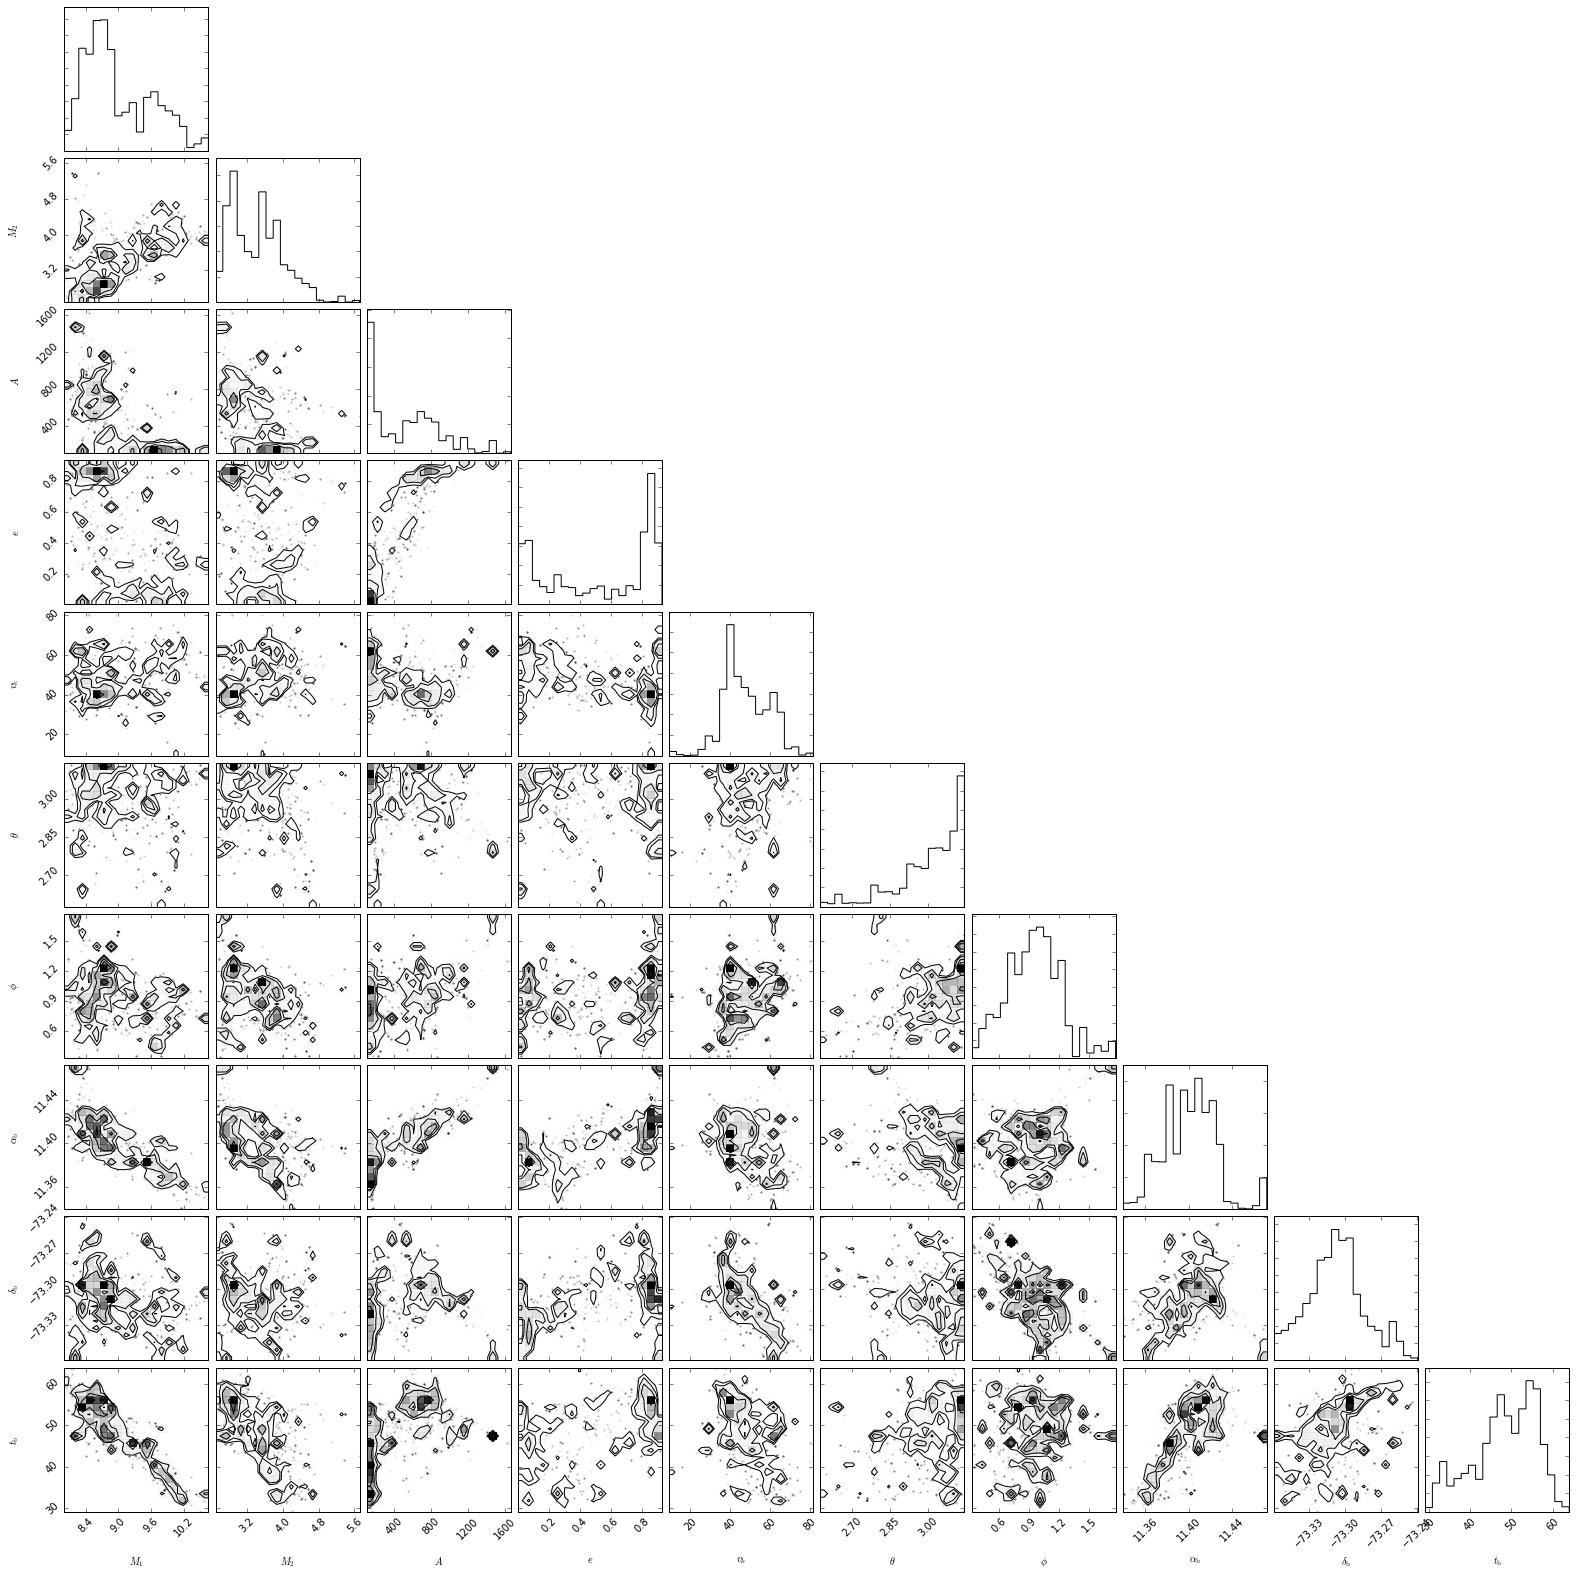

In [8]:

labels = [r"$M_1$", r"$M_2$", r"$A$", r"$e$", r"$v_k$", r"$\theta$", r"$\phi$", r"$\alpha_{\rm b}$", r"$\delta_{\rm b}$", r"$t_{\rm b}$"]
fig = corner.corner(sampler.flatchain, labels=labels)

plt.rc('font', size=18)

plt.savefig('../figures/J0045_corner.pdf')

plt.rc('font', size=10)



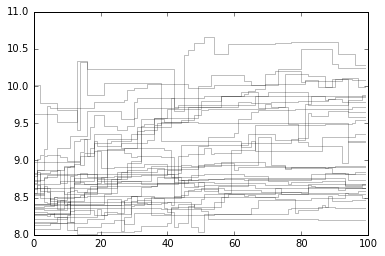

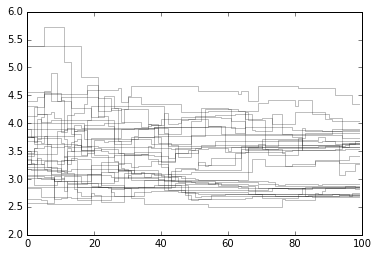

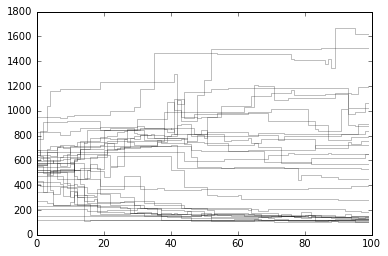

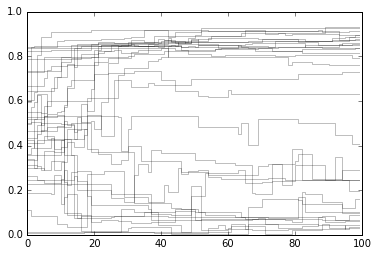

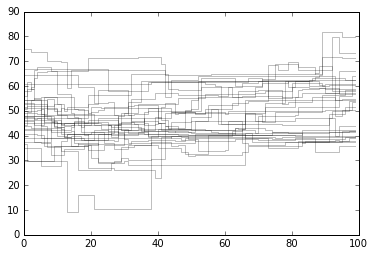

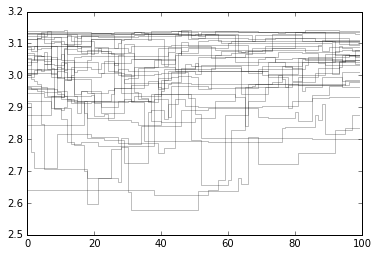

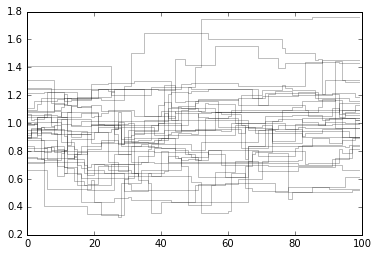

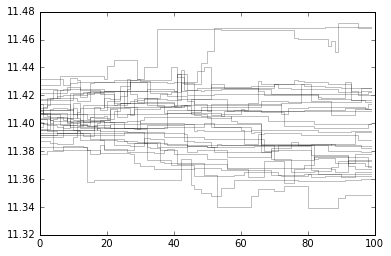

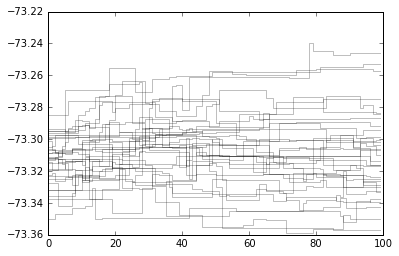

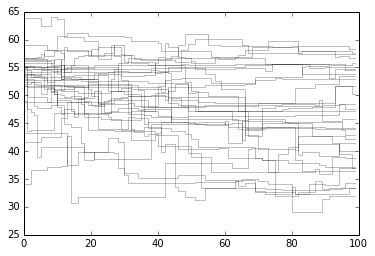

In [9]:
for i in range(sampler.dim):
    plt.figure()
    for chain in sampler.chain[...,i]:
        plt.plot(chain, alpha=0.25, color='k', drawstyle='steps')
        
plt.savefig('../figures/J0045_chains.pdf')
        

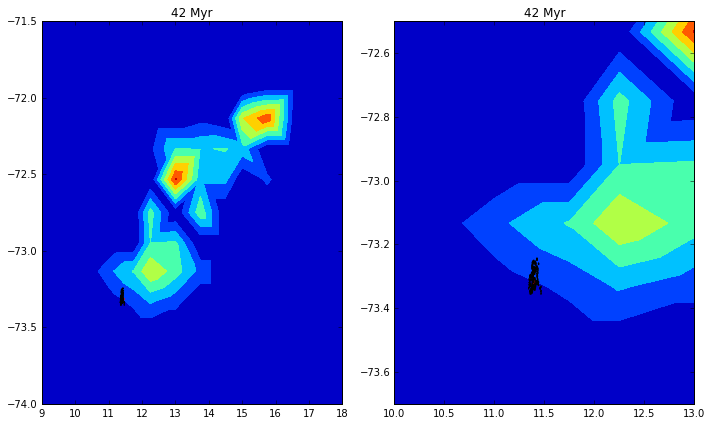

In [13]:



plt.figure(figsize=(10.0, 6.0))

ra_out = sampler.flatchain.T[7]
dec_out = sampler.flatchain.T[8]

plt.subplot(1,2,2)
sf_history.get_SMC_plot(42.0)

plt.scatter(ra_J0045, dec_J0045, marker="*", s=20, color='r')

plt_kwargs = {'colors':'k'}
density_contour.density_contour(ra_out, dec_out, nbins_x=25, nbins_y=25, **plt_kwargs)

plt.xlim(10.0, 13.0)
plt.ylim(-73.7, -72.5)



plt.subplot(1,2,1)
sf_history.get_SMC_plot(42.0)

plt.scatter(ra_J0045, dec_J0045, marker="*", s=20, color='r')

plt_kwargs = {'colors':'k'}
density_contour.density_contour(ra_out, dec_out, nbins_x=25, nbins_y=25, **plt_kwargs)

plt.xlim(9.0, 18.0)
plt.ylim(-74.0, -71.5)


plt.tight_layout()

plt.savefig('../figures/J0045_dist_birth_location.pdf')


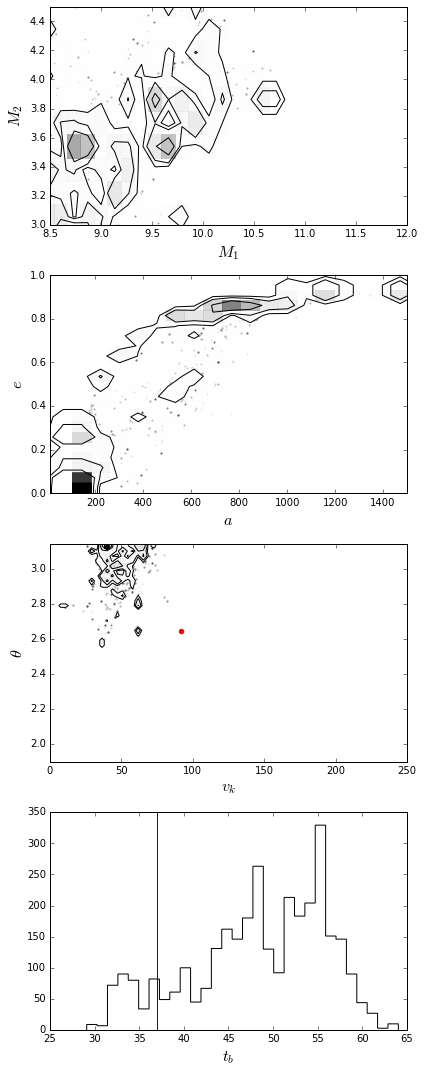

In [14]:
plt.figure(figsize=(6,15))

# Orbital period
plt.subplot(4,1,1)
corner.hist2d(sampler.flatchain.T[0], sampler.flatchain.T[1])
plt.scatter(init_params_J0045["M1"], init_params_J0045["M2"], color='r')
plt.xlabel(r"$M_1$", size=16)
plt.ylabel(r"$M_2$", size=16)
plt.xlim(8.5, 12.0)
plt.ylim(3.0, 4.5)

# Orbital eccentricity
plt.subplot(4,1,2)
corner.hist2d(sampler.flatchain.T[2], sampler.flatchain.T[3])
plt.scatter(init_params_J0045["A"], init_params_J0045["ecc"], color='r')
plt.xlabel(r"$a$", size=16)
plt.ylabel(r"$e$", size=16)
plt.xlim(10.0, 1500.0)
plt.ylim(0.0, 1.0)

# Companion mass
plt.subplot(4,1,3)
corner.hist2d(sampler.flatchain.T[4], sampler.flatchain.T[5])
plt.scatter(init_params_J0045["v_k"], init_params_J0045["theta"], color='r')
plt.xlabel(r"$v_k$", size=16)
plt.ylabel(r"$\theta$", size=16)
plt.xlim(0.0, 250.0)
plt.ylim(1.9, np.pi)

# Birth position
plt.subplot(4,1,4)
plt.hist(sampler.flatchain.T[9], histtype='step', color='k', bins=30)
for i in np.arange(len(init_params_J0045)):
    plt.axvline(init_params_J0045["t_b"][i])

plt.xlabel(r"$t_b$", size=16)

plt.tight_layout()

plt.savefig('../figures/J0045_MCMC_pop_synth_compare.pdf')
#plt.show()
